In [1]:
import numpy as np

from boela import problems
from boela.ela import vm_features, vm_triples
from boela.model import build_gp_matern, calc_suitability, calc_r2_cv
from boela.problems.problem import ProblemBase

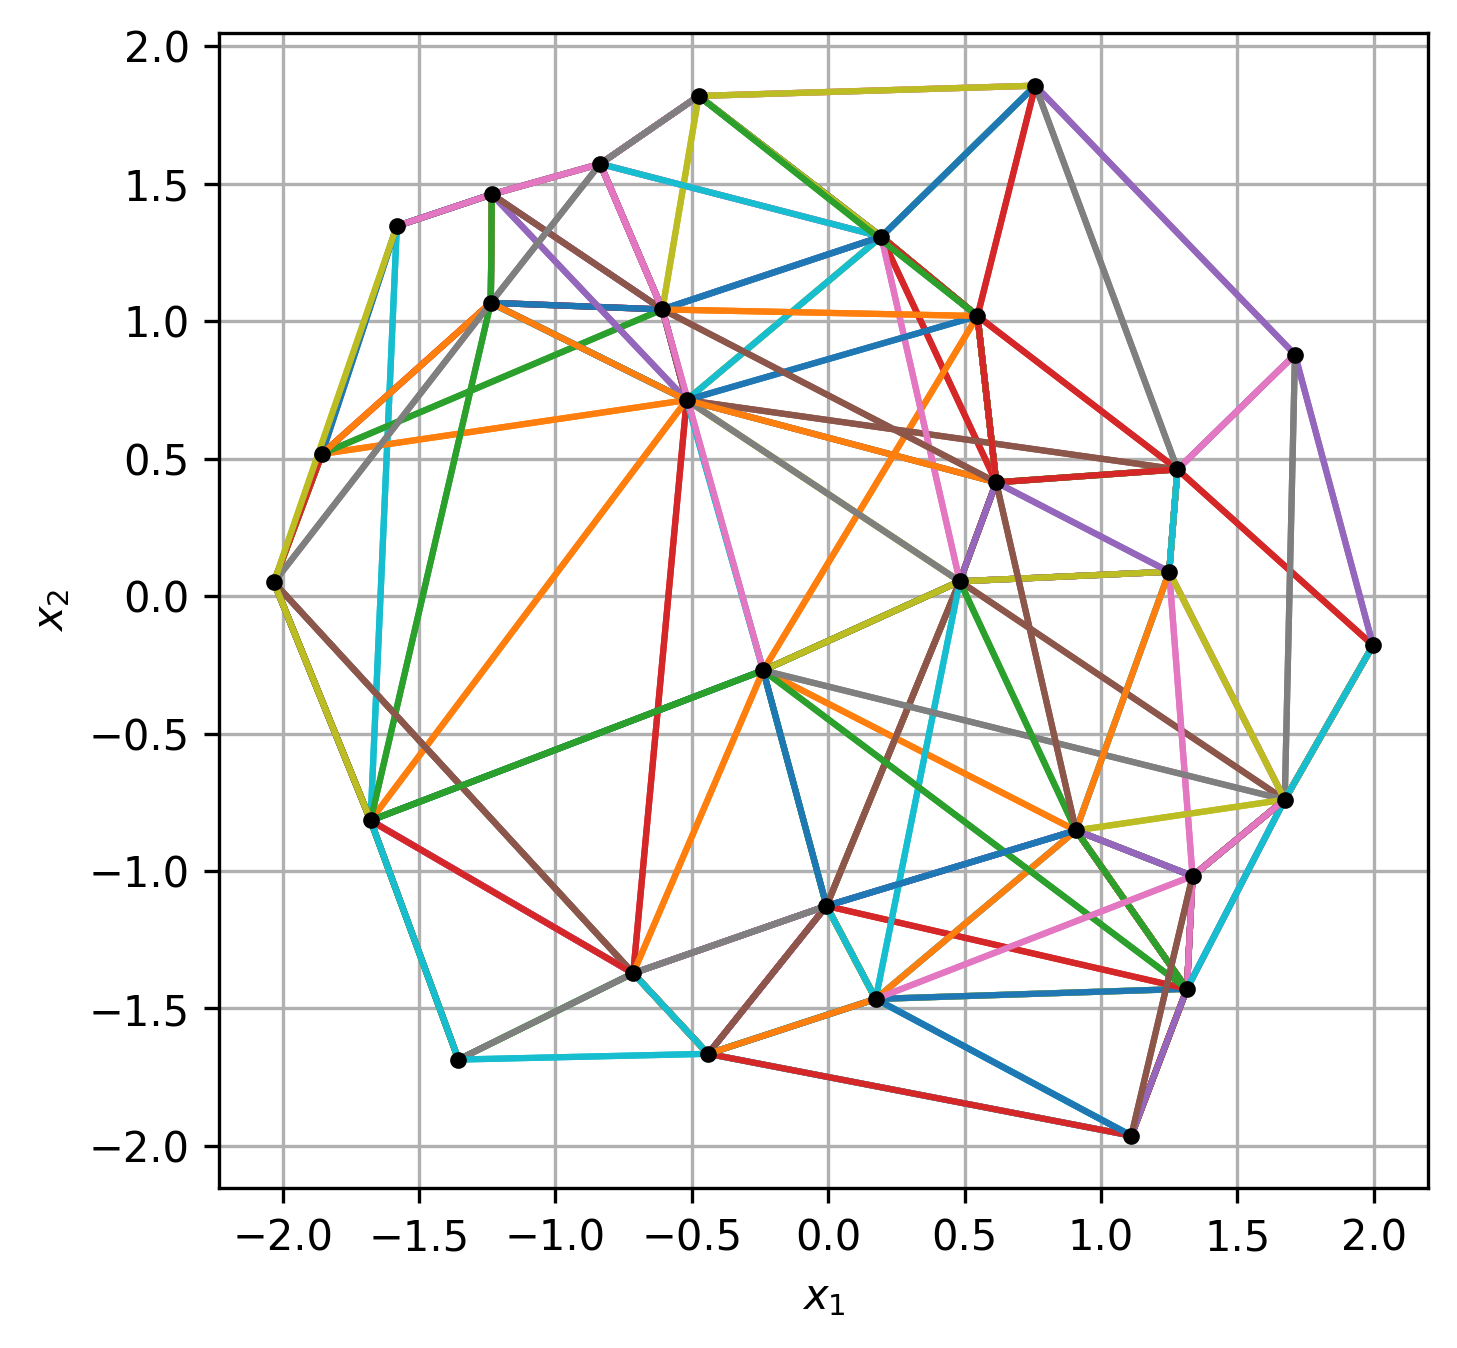

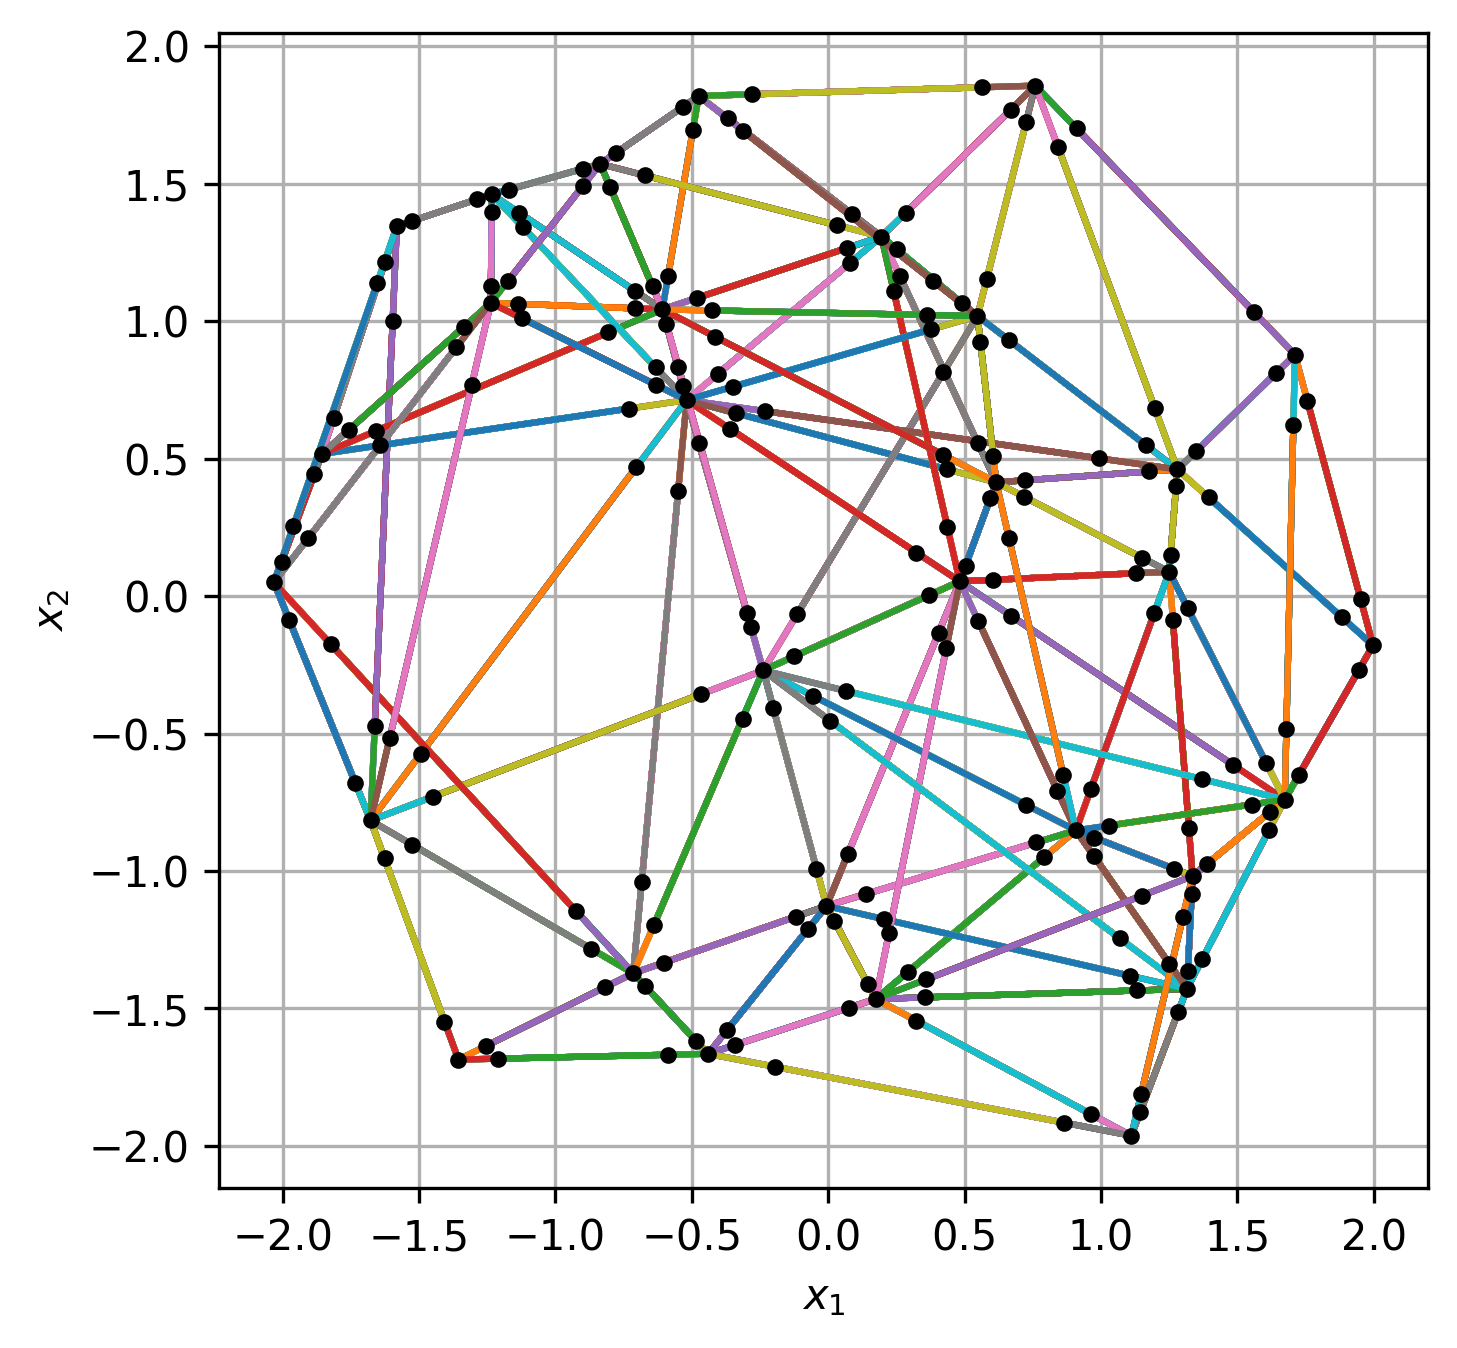

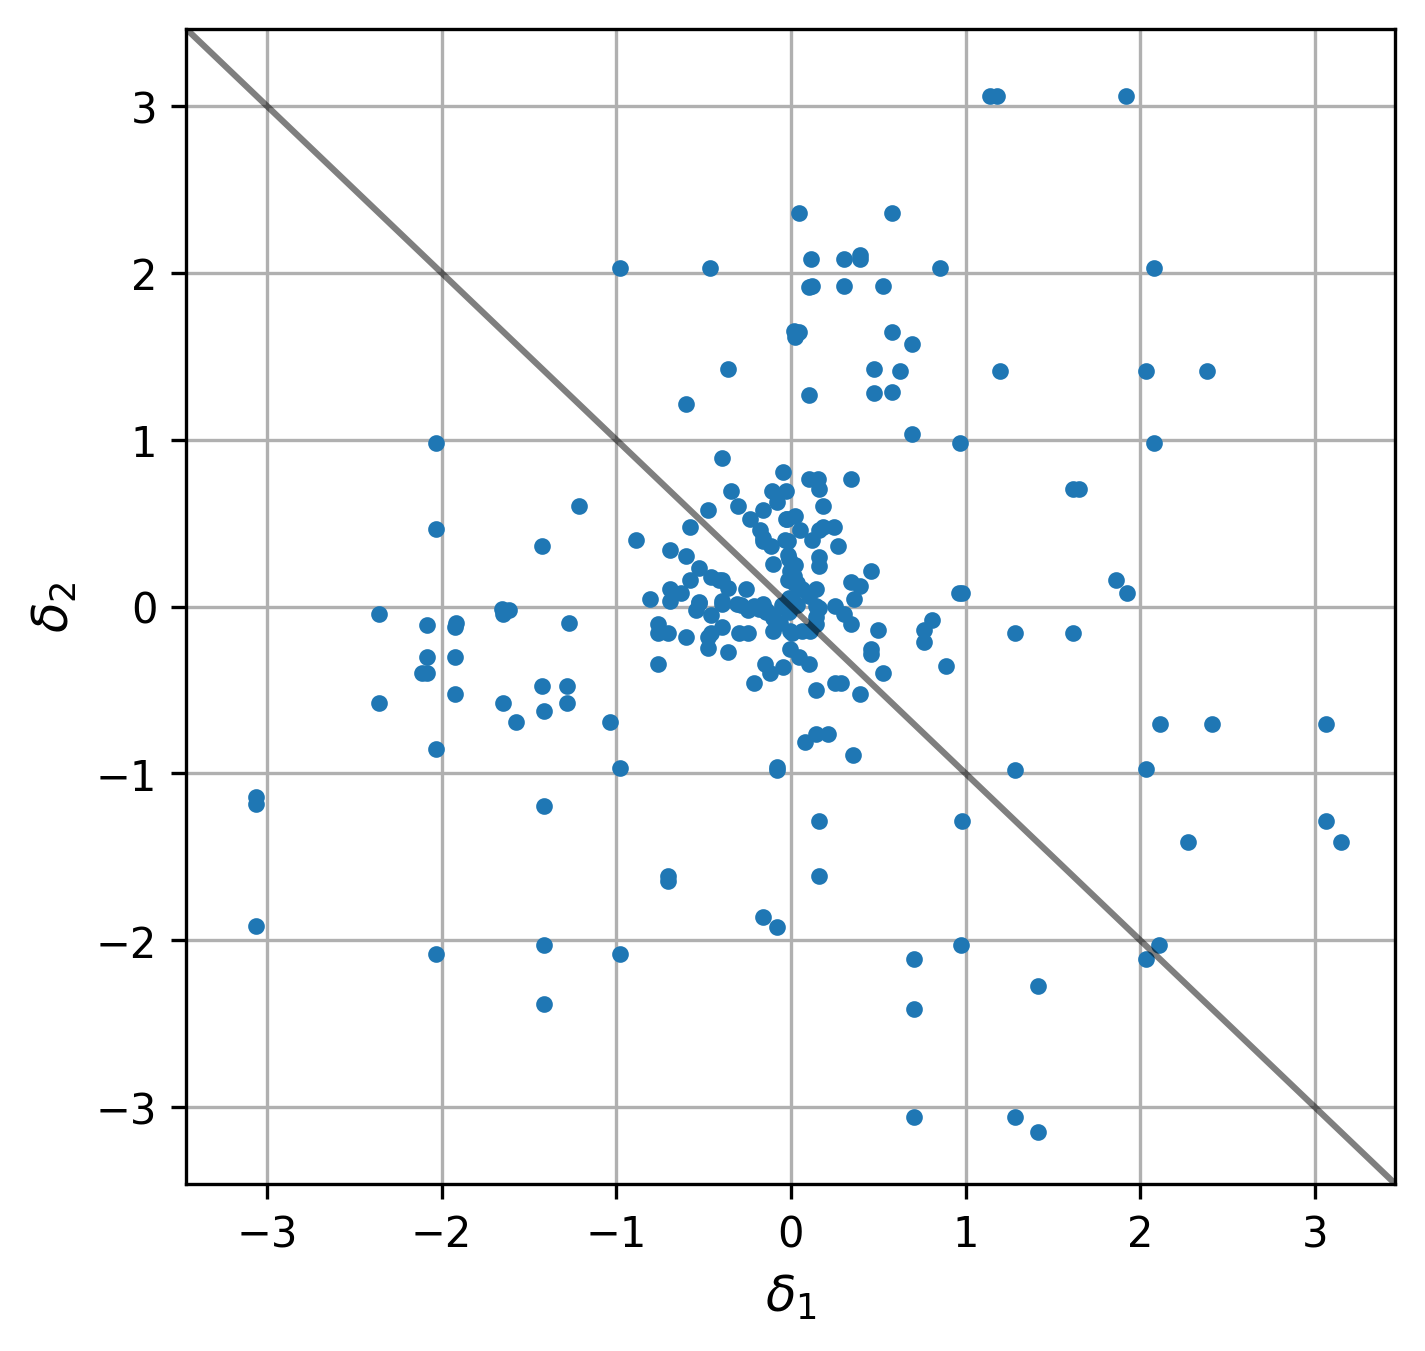

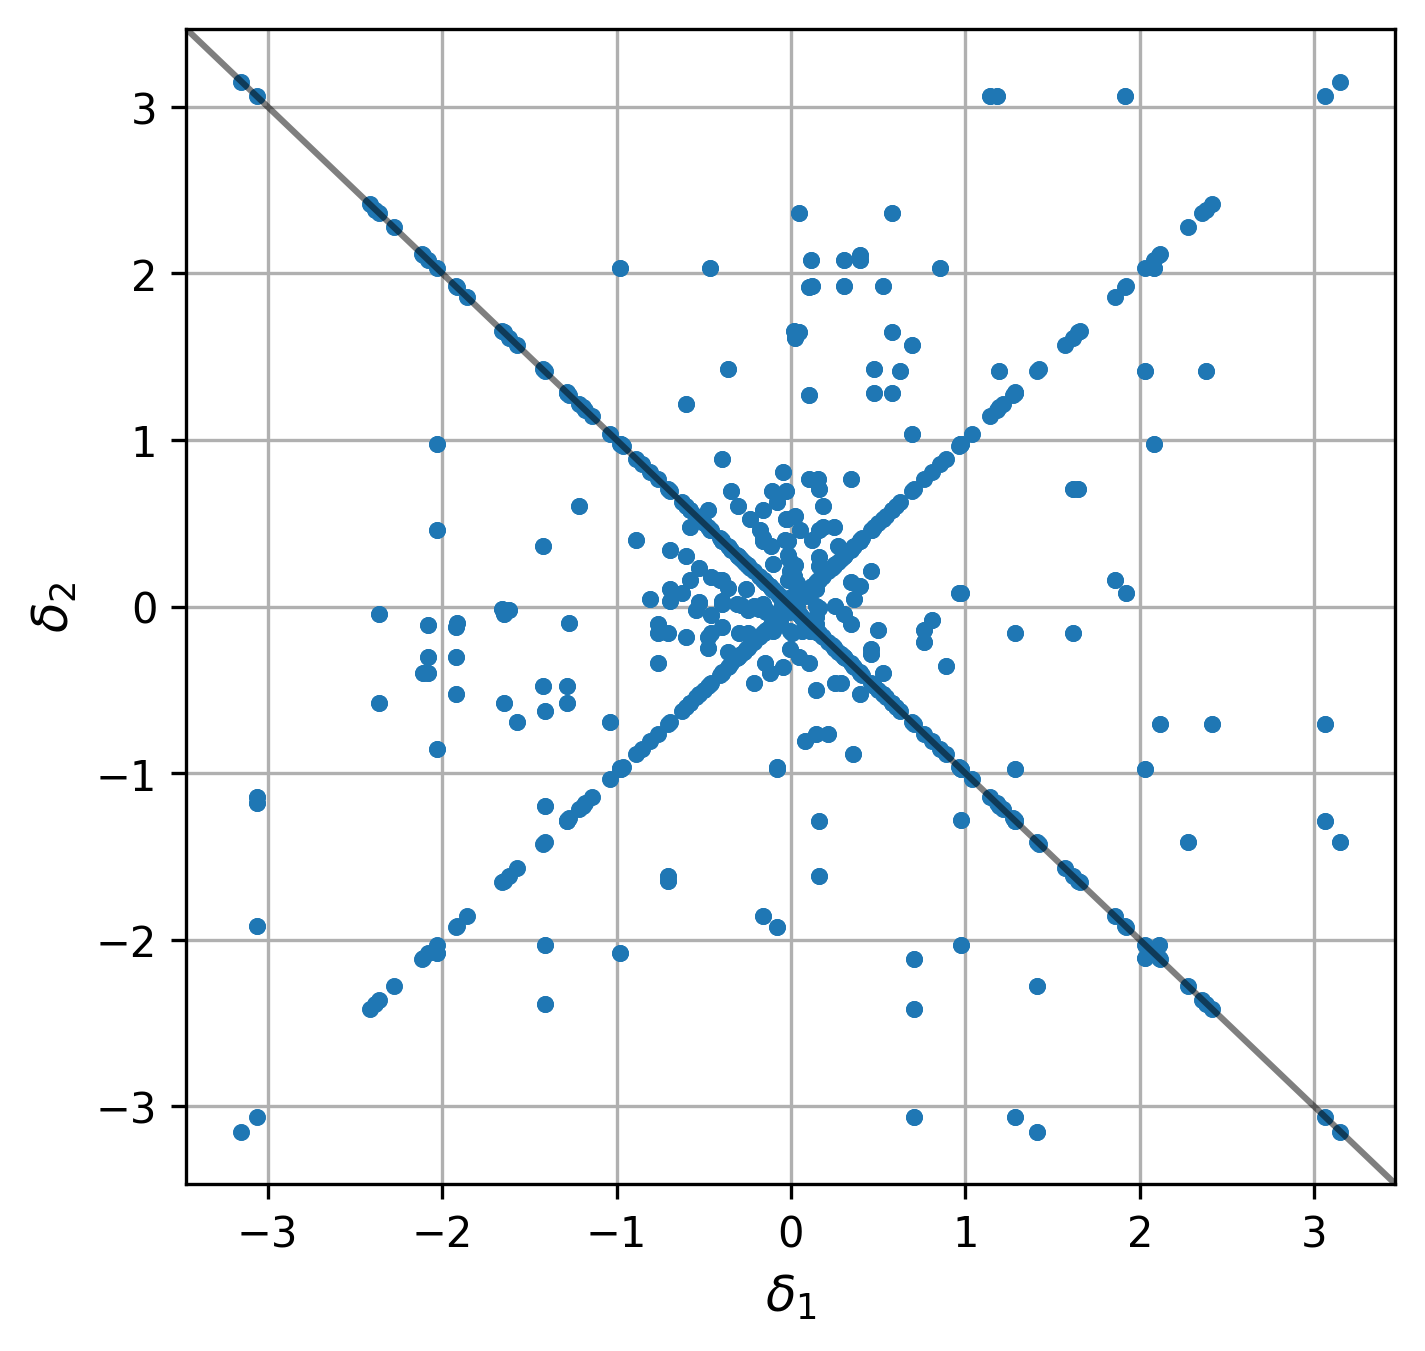

In [2]:

problem: ProblemBase = problems.f1.rosenbrock.Problem(2)
x, f = problem.sample_rand(30, seed=10)

triples = vm_triples.collect_space_filling(x, 2 * x.size, symmetric=True)
vm = vm_features.VariabilityMap(x, f, triples)
vm_ext = vm.copy_extended(symmetric=True, n_splits_min=2, n_splits_max=2, log_rate=10, log_splits=True)

vm_triples.plot(x, triples, size=(5.2, 5), dpi=300)
vm_triples.plot(vm_ext.x, vm_ext.triples, size=(5.2, 5), dpi=300)
vm.plot(size=(5.2, 5), dpi=300)
vm_ext.plot(size=(5.2, 5), dpi=300)


nu=0.5 model.kernel_=Matern(length_scale=2.06, nu=0.5)
 model.score(x, f)=1.000
 model.score(vm_ext.x, vm_ext.f)=0.989
 calc_suitability(model, x, f)=1.000
 calc_suitability(model, vm_ext.x, vm_ext.f)=0.951
 angles_mean=0.000
 angles_mean_ext=13.727


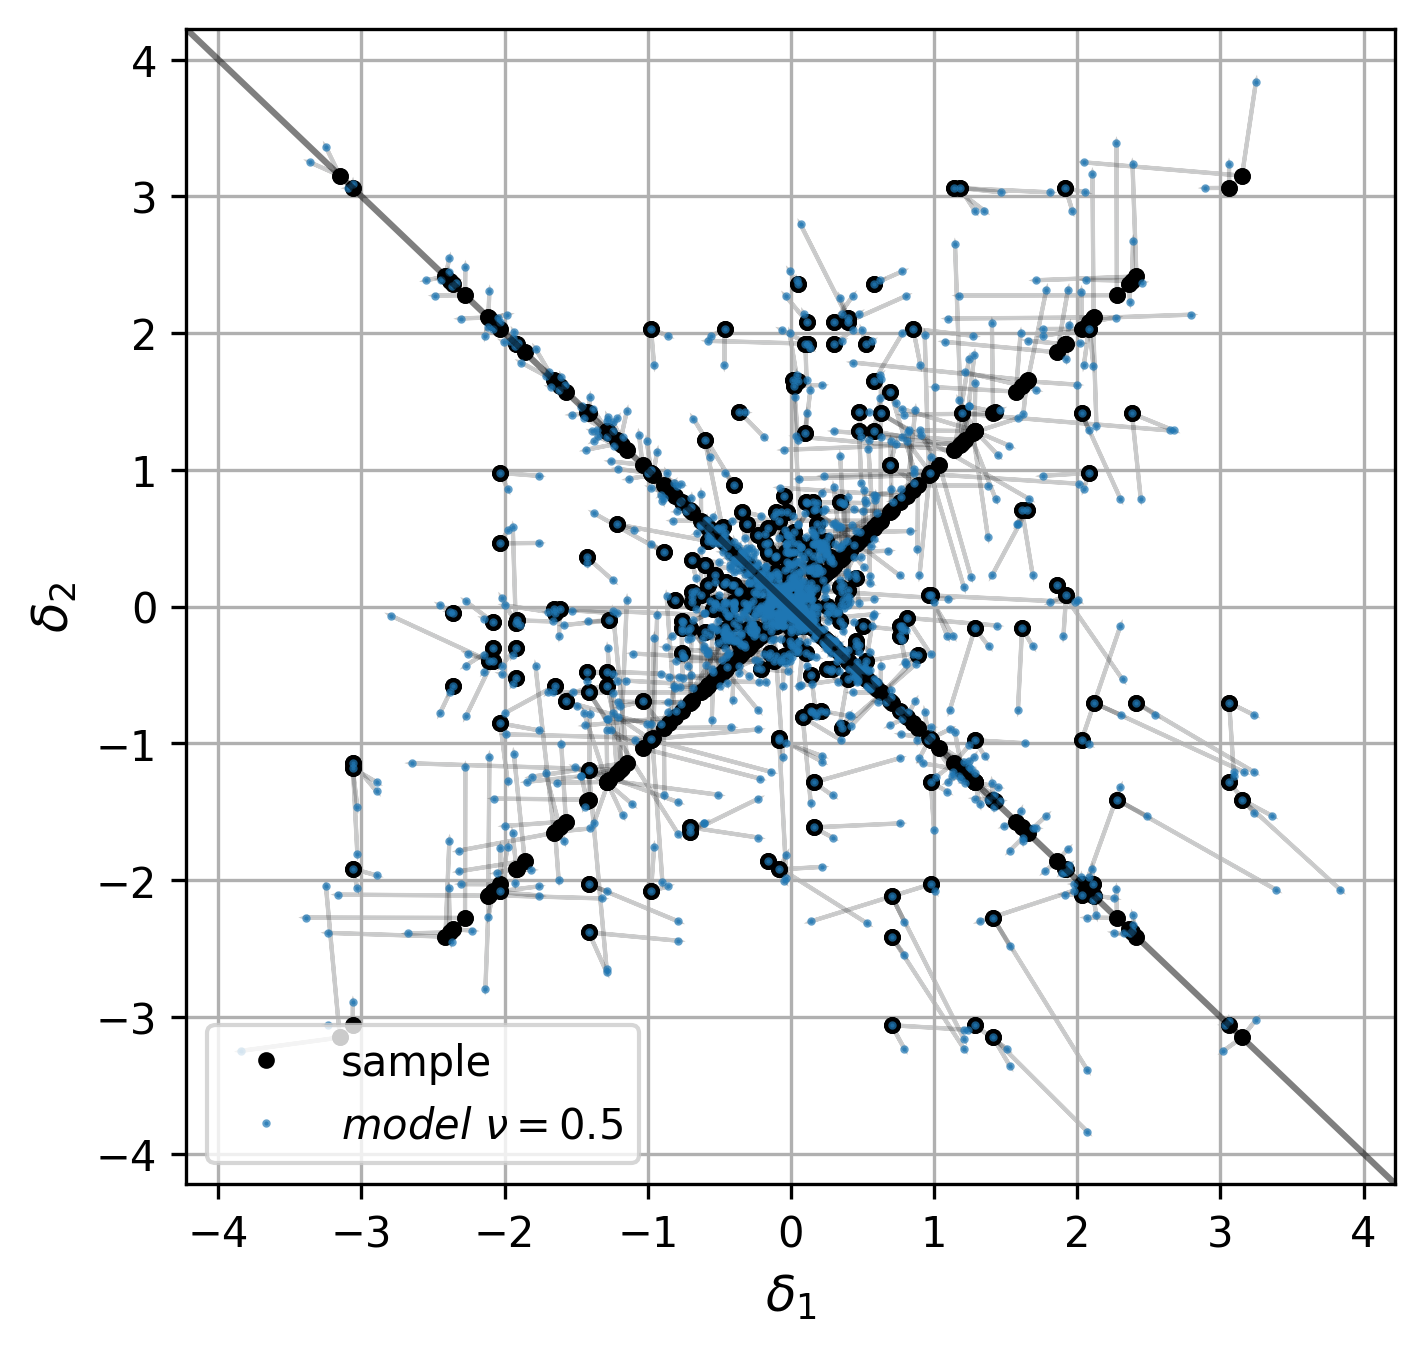


nu=2.5 model.kernel_=Matern(length_scale=1.24, nu=2.5)
 model.score(x, f)=1.000
 model.score(vm_ext.x, vm_ext.f)=0.979
 calc_suitability(model, x, f)=1.000
 calc_suitability(model, vm_ext.x, vm_ext.f)=0.924
 angles_mean=0.001
 angles_mean_ext=19.768


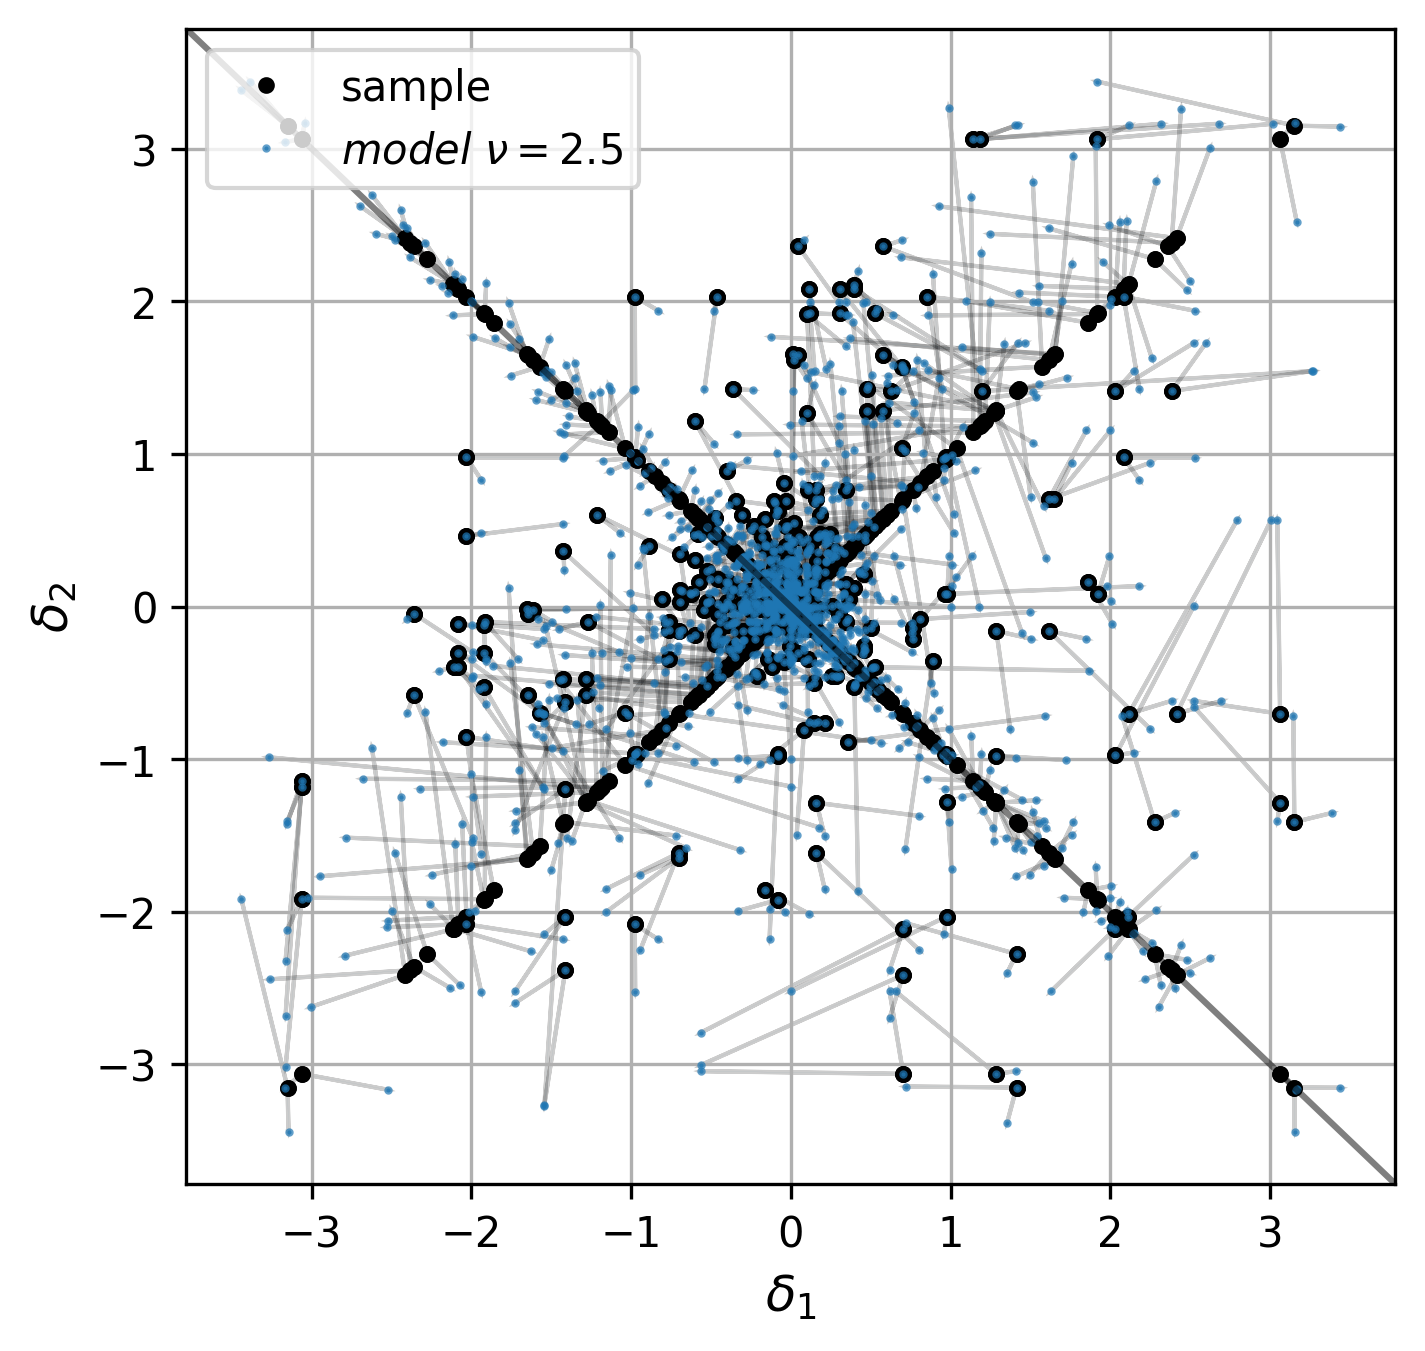

In [3]:
for nu in [0.5, 2.5]:
    model = build_gp_matern(x, f, nu=nu)
    print(f"\n{nu=} {model.kernel_=}")
    print(f" {model.score(x, f)=:.3f}")
    print(f" {model.score(vm_ext.x, vm_ext.f)=:.3f}")
    print(f" {calc_suitability(model, x, f)=:.3f}")
    print(f" {calc_suitability(model, vm_ext.x, vm_ext.f)=:.3f}")
    angles_mean = vm.validate(model)
    angles_mean_ext = vm_ext.validate(model)
    print(f" {angles_mean=:.3f}")
    print(f" {angles_mean_ext=:.3f}")

    # plot_surface(model.predict, x.min(0), x.max(0), sample_x=vm_ext.x, sample_f=vm_ext.f, contour=True)
    vm_ext.plot_model(model, size=(5.2, 5), dpi=300, model_tag=f"$model\ \\nu={nu}$")

In [4]:
scores = []
suits = []
suits_ext = []
angles = []
angles_ext = []

for i, p_class in enumerate(problems.bbob._all):
    problem: ProblemBase = p_class.Problem(2)
    for seed in range(20):
        for nu in [0.5, 1.5, 2.5, np.inf]:
            x, f = problem.sample_rand(100, seed=seed)
            triples = vm_triples.collect_space_filling(x, 2 * x.size, symmetric=True)
            vm = vm_features.VariabilityMap(x, f, triples)
            vm_ext = vm.copy_extended()

            model = build_gp_matern(x, f, nu=nu)
            score = calc_r2_cv(model, x, f)
            angles_mean = vm.validate(model)
            angles_mean_ext = vm_ext.validate(model)
            suit = calc_suitability(model, x, f)
            suit_ext = calc_suitability(model, vm_ext.x, vm_ext.f)

            scores.append(score)
            suits.append(suit)
            angles.append(angles_mean)
            suits_ext.append(suit_ext)
            angles_ext.append(angles_mean_ext)

            print(f"{i}/{len(problems.bbob._all)} {problem.NAME} {seed=} {nu=} {model.kernel_=}")

            # print(f" {score=:.3f}")
            # print(f" {suit=:.3f}")
            # print(f" {angles_mean=:.3f}")
            # print(f" {suit_ext=:.3f}")
            # print(f" {angles_mean_ext=:.3f}")

0/24 bbob.attractive_sector seed=0 nu=0.5 model.kernel_=Matern(length_scale=20.8, nu=0.5)
0/24 bbob.attractive_sector seed=0 nu=1.5 model.kernel_=Matern(length_scale=6, nu=1.5)
0/24 bbob.attractive_sector seed=0 nu=2.5 model.kernel_=Matern(length_scale=3.14, nu=2.5)
0/24 bbob.attractive_sector seed=0 nu=inf model.kernel_=Matern(length_scale=1.03, nu=inf)
0/24 bbob.attractive_sector seed=1 nu=0.5 model.kernel_=Matern(length_scale=22.3, nu=0.5)
0/24 bbob.attractive_sector seed=1 nu=1.5 model.kernel_=Matern(length_scale=5.15, nu=1.5)
0/24 bbob.attractive_sector seed=1 nu=2.5 model.kernel_=Matern(length_scale=2.72, nu=2.5)
0/24 bbob.attractive_sector seed=1 nu=inf model.kernel_=Matern(length_scale=1.18, nu=inf)
0/24 bbob.attractive_sector seed=2 nu=0.5 model.kernel_=Matern(length_scale=22.8, nu=0.5)
0/24 bbob.attractive_sector seed=2 nu=1.5 model.kernel_=Matern(length_scale=5.89, nu=1.5)
0/24 bbob.attractive_sector seed=2 nu=2.5 model.kernel_=Matern(length_scale=2.79, nu=2.5)
0/24 bbob.att

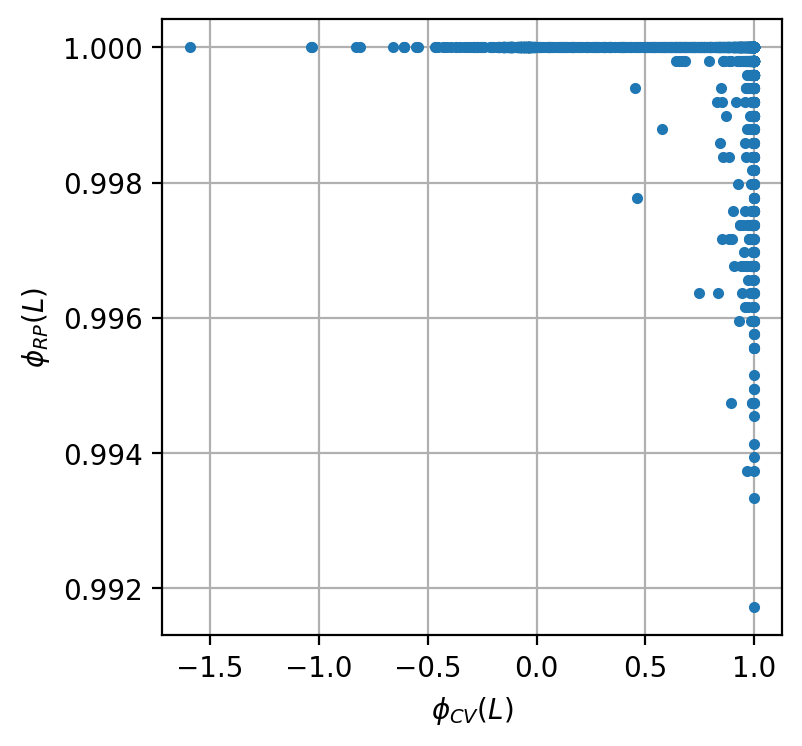

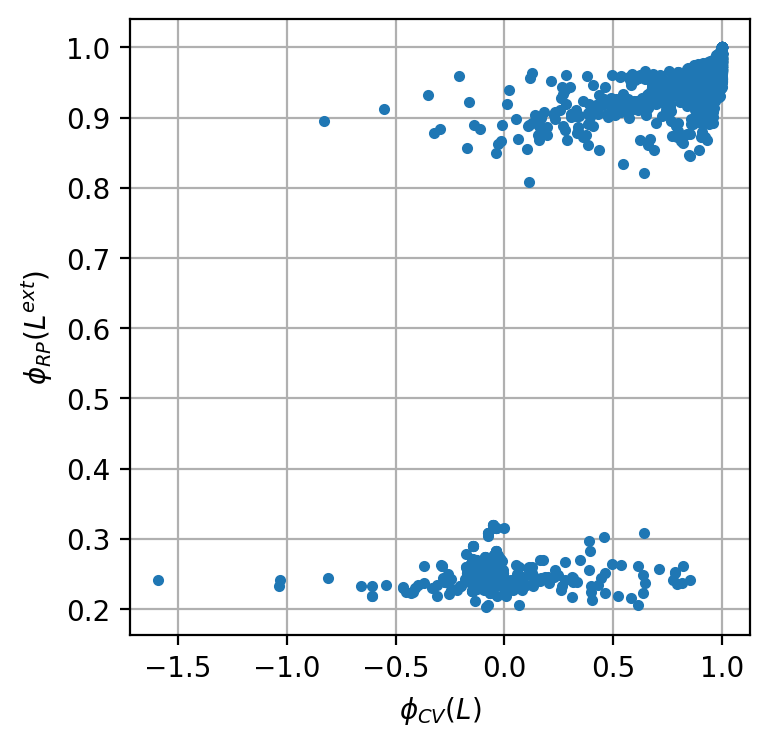

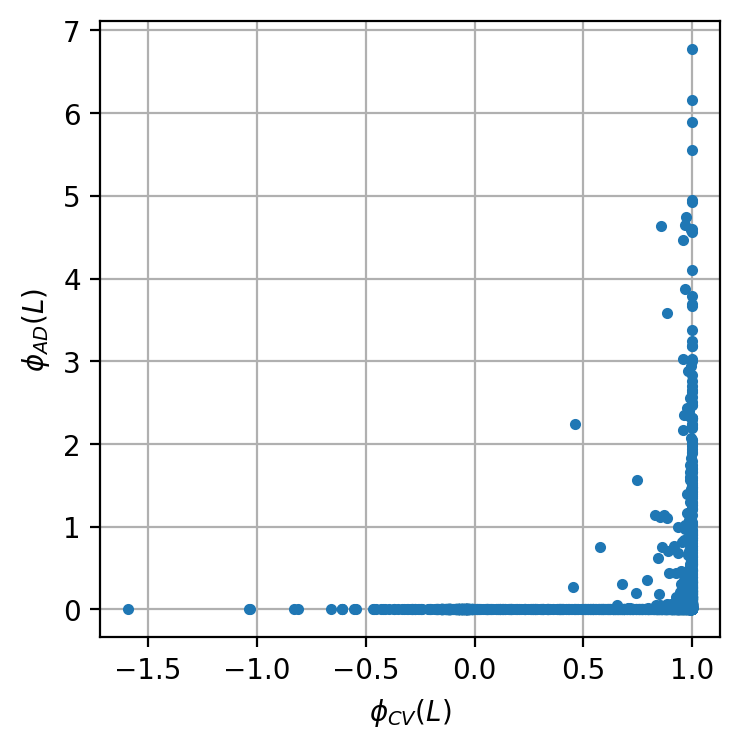

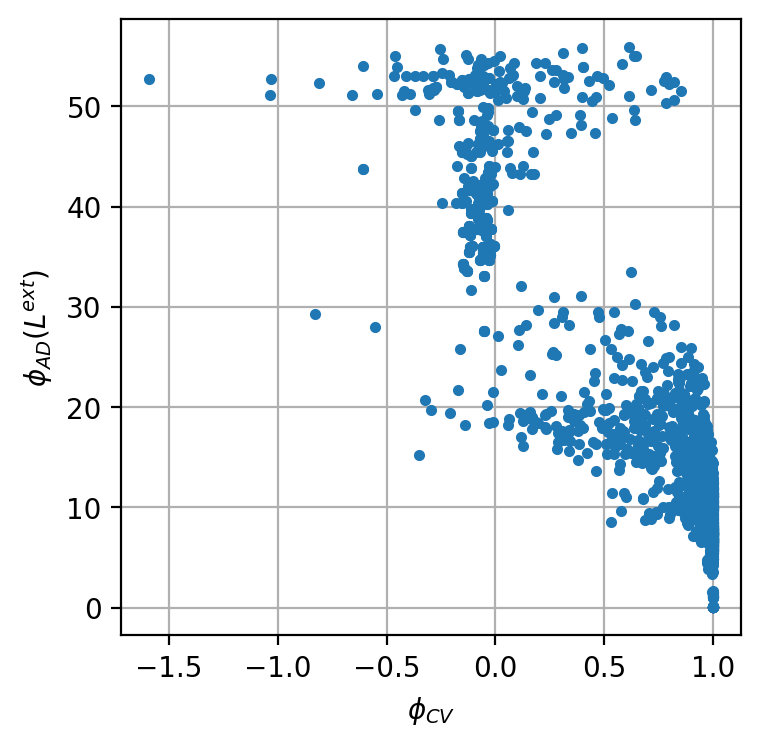

In [5]:
import matplotlib.pyplot as plt

SIZE = (4, 4)
DPI = 200

plt.figure(figsize=SIZE, dpi=DPI)
plt.plot(scores, suits, ".")
plt.xlabel("$\phi_{CV}(L)$")
plt.ylabel("$\phi_{RP}(L)$")
plt.grid()
plt.show()

plt.figure(figsize=SIZE, dpi=DPI)
plt.plot(scores, suits_ext, ".")
plt.xlabel("$\phi_{CV}(L)$")
plt.ylabel("$\phi_{RP}(L^{ext})$")
plt.grid()
plt.show()

plt.figure(figsize=SIZE, dpi=DPI)
plt.plot(scores, angles, ".")
plt.xlabel("$\phi_{CV}(L)$")
plt.ylabel("$\phi_{AD}(L)$")
plt.grid()
plt.show()

plt.figure(figsize=SIZE, dpi=DPI)
plt.plot(scores, angles_ext, ".")
plt.xlabel("$\phi_{CV}$")
plt.ylabel("$\phi_{AD}(L^{ext})$")
plt.grid()
plt.show()